# Goodreads: Exploratory Data Analysis
#### by Daniel Walker, 26th of Septemeber 2019

Housekeeping / TODO 

Write insights/thoughts on graphs and data.  
Talk about making specific minimalist graphs, how to display data otherwise(for the one where the graph wont work well at all).  

Write conclusion on data /
what I've learnt / 
what I now know extra but havent used?

## Contents  
  
[Introduction](#intro)
  
[Describing the data](#describing)  
  
[Supporting Functions](#supportfuncs)  
      
[Exploratory Data Analysis](#dataexplore)  
  [1. Who are the top 10 authors by books published?](#1)  
  [2. What are the 5 most common language of books?](#2)  
  [3. Who are the top 5 authors by number of ratings?](#3)   
  [4. Who are the top 5 authors by average rating? (No Num of Ratings Limit)](#4)    
  [5. Who are the top 5 authors by average rating? (Num of Ratings > 100)](#5)    
  [6. Who are the top 5 authors by average rating? (Num of Ratings > 1000)](#6)   
  [7. Who are the top 5 authors by average number of page per book?](#7)  
  [8. What are the top 10 books by average rating? (No limit)](#8)  
  [9. What are the top 10 books by average rating? (Num of Ratings > 100)](#9)    
  [10. What are the top 10 books by average rating? (Num of Ratings > 1000)](#10)      
  [11. Which books are top 5 based on their number of ratings?](#11)  
  [12. What is the average ratings of all books in the dataset?](#12)  
  [13. Is there a relationship between average rating and number of ratings for books?](#13)    
  [14. Is there a relationship between the number of books published and the average rating of all those books per author?](#14)  
  [15. What is the relationship between the number of pages of a book and its number of rating?](#15)  
  
[Learning Takeaways](#takeaways)   
  
[Summary](#summary)    

<a id="intro"></a>
## Introduction
  
Goodreads: Exploratory Data Analysis is a project I have been working through with two main aims; firstly to find interesting things from the data, and secondly to learn and play with seaborn and its associated libraries.
  
The data set was sourced on the the 16th of September 2019 at 13:23gmt from [Kaggle](https://www.kaggle.com/jealousleopard/goodreadsbooks). The dataset was chosen as it was promised to be clean, (so I could focus more on the visulisation rather than data cleaning/engineering), and also that I like to read which makes it an interesting subject.

<a id='#describing'></a>
# Describing the data

### Loading libraries and filtering warnings

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("./data/books.csv", error_bad_lines=False)

In [10]:
df.set_index(['bookID'], inplace=True)

In [11]:
df.tail(2)

,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,
47708,The Faeries' Oracle,Brian Froud-Jessica Macbeth,4.43,743201116,9.780000e+12,eng,224,1550,38
47709,The World of The Dark Crystal,Brian Froud,4.29,1862056242,9.780000e+12,eng,132,3572,33


In [12]:
# Mention isbn being object not number ect.
df.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
dtype: object

Very shortly after importing the data (books.csv), I noticed there were a few errors. These were fixed though various methods; opening the csv in excel, changing datatypes with pandas, and using pythons built in methods like .strip() and string formatting.
  
Some of the errors include:

- isbn13 numbers being displayed with scientific notation, therefore not usable as numbers.  
- Author's names having extra spaces and tabs in the strings.  
- Some of the rows had data pushed one column to the right, making some rows have 11 columns of data rather than the expected 10.

<a id='#supportfuncs'></a>
# Supporting Functions

This section was initially much larger but has now been trimmed back to just one supporting fucntion. The other function were used for data cleaning / formatting and were used once to edit the dataset rather than on every run of this notebook.

In [13]:
def minimalhbargraph():
    """Disables axis ticks and labels, outer axis 'box', sets seaborn context.
       Makes the graph very minimalist.
    """
    sns.set_context('poster')
    ax.set_ylabel('')
    ax.set_xlabel("")
    ax.set_yticks([])
    ax.set_xticks([])
    plt.tight_layout()
    ax.axis('off')

<a id='#dataexplore'></a>
# Exploratory Data Analysis

<a id='#1'></a>
## 1. Who are the top 10 authors by books published? 

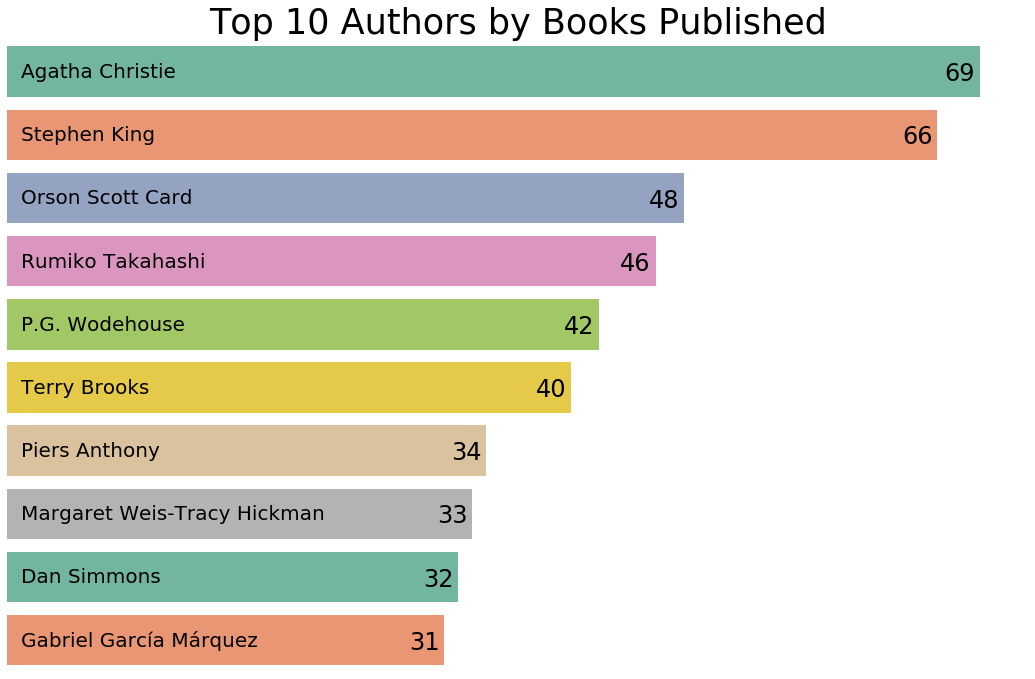

In [14]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='Set2')
ax.set_title("Top 10 Authors by Books Published", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-2.5, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(1 , i.get_y()+0.5, str(most_books.index[num]), fontsize = 20, color = 'k')
    num += 1


<a id='#2'></a>
## 2. What are the 5 most common language of books? 

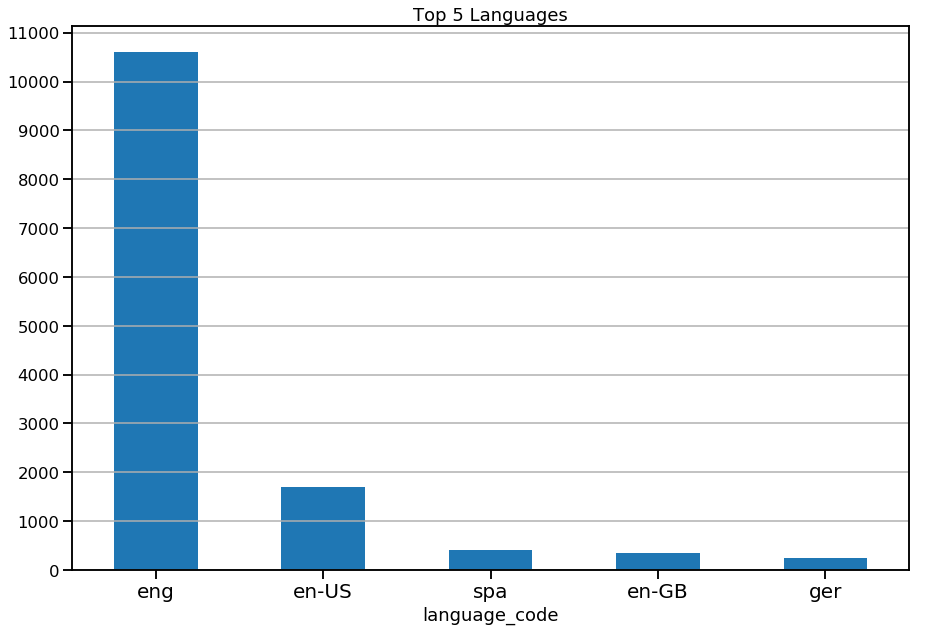

In [15]:
sns.set_context('talk')
plt.figure(figsize=(15,10))
ax =  df.groupby('language_code')['title'].count().sort_values(ascending=False).head(5).plot.bar()
plt.title('Top 5 Languages')
plt.xticks(fontsize = 20, rotation='horizontal')
plt.yticks([i*1000 for i in range(0, 12)])
plt.grid(axis='y')

<a id='#3'></a>
## 3. Who are the top 5 authors by number of ratings? 

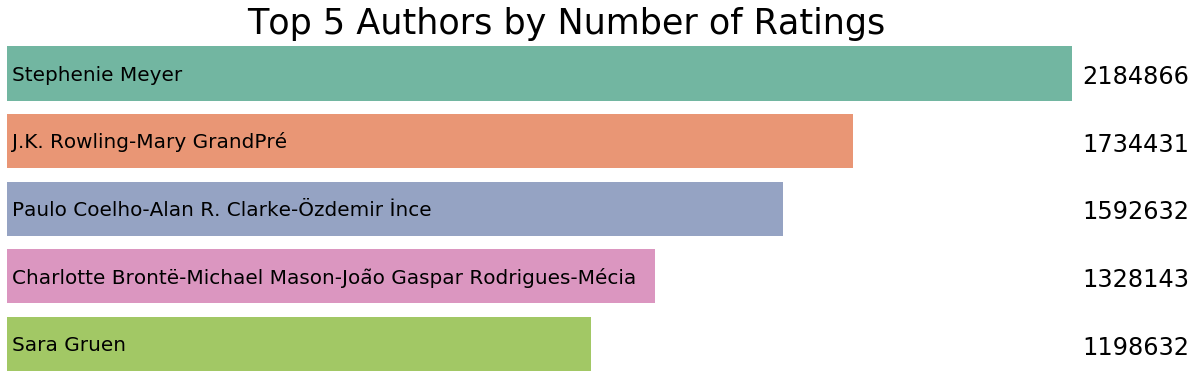

In [16]:
rating_author = df.groupby('authors').mean()
top_5_num_ratings = rating_author.sort_values('ratings_count', ascending=False).head(5)

plt.figure(figsize=(16.5, 6))
ax = sns.barplot(top_5_num_ratings['ratings_count'], top_5_num_ratings.index, palette='Set2')
ax.set_title("Top 5 Authors by Number of Ratings", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(2204866, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(10000 , i.get_y()+0.5, str(top_5_num_ratings.index[num]), fontsize = 20, color = 'k')
    num += 1


<a id='#4'></a>
## 4. Who are the top 5 authors by average rating? (No Num of Ratings Limit)

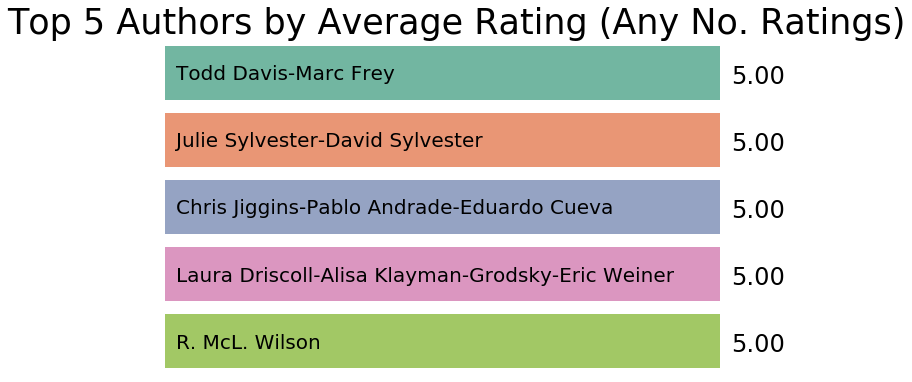

In [17]:
rating_author = df.groupby('authors').mean()
top_5_rating_author = rating_author.sort_values('average_rating', ascending=False).head(5)

rating_author = rating_author.loc[rating_author['ratings_count'] > 100]
top_5_rating_author_over100 = rating_author.sort_values('average_rating', ascending=False).head(5)

rating_author = rating_author.loc[rating_author['ratings_count'] > 1000]
top_5_rating_author_over1000 = rating_author.sort_values('average_rating', ascending=False).head(5)


plt.figure(figsize=(12, 6))
ax = sns.barplot(top_5_rating_author['average_rating'], top_5_rating_author.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Rating (Any No. Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()+0.1, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(0.1 , i.get_y()+0.5, str(top_5_rating_author.index[num]), fontsize = 20, color = 'k')
    num += 1


<a id='#5'></a>
## 5. Who are the top 5 authors by average rating? (Num of Ratings > 100)

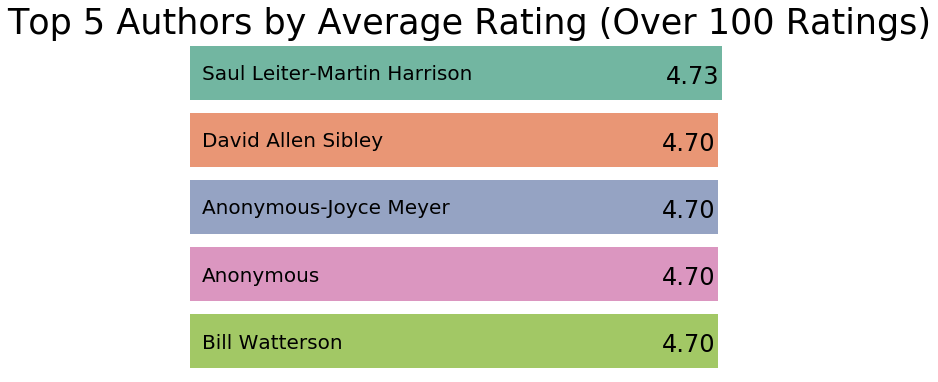

In [18]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(top_5_rating_author_over100['average_rating'], top_5_rating_author_over100.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Rating (Over 100 Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.5, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(0.1 , i.get_y()+0.5, str(top_5_rating_author_over100.index[num]), fontsize = 20, color = 'k')
    num += 1

    


<a id='#6'></a>
## 6. Who are the top 5 authors by average rating? (Num of Ratings > 1000) 

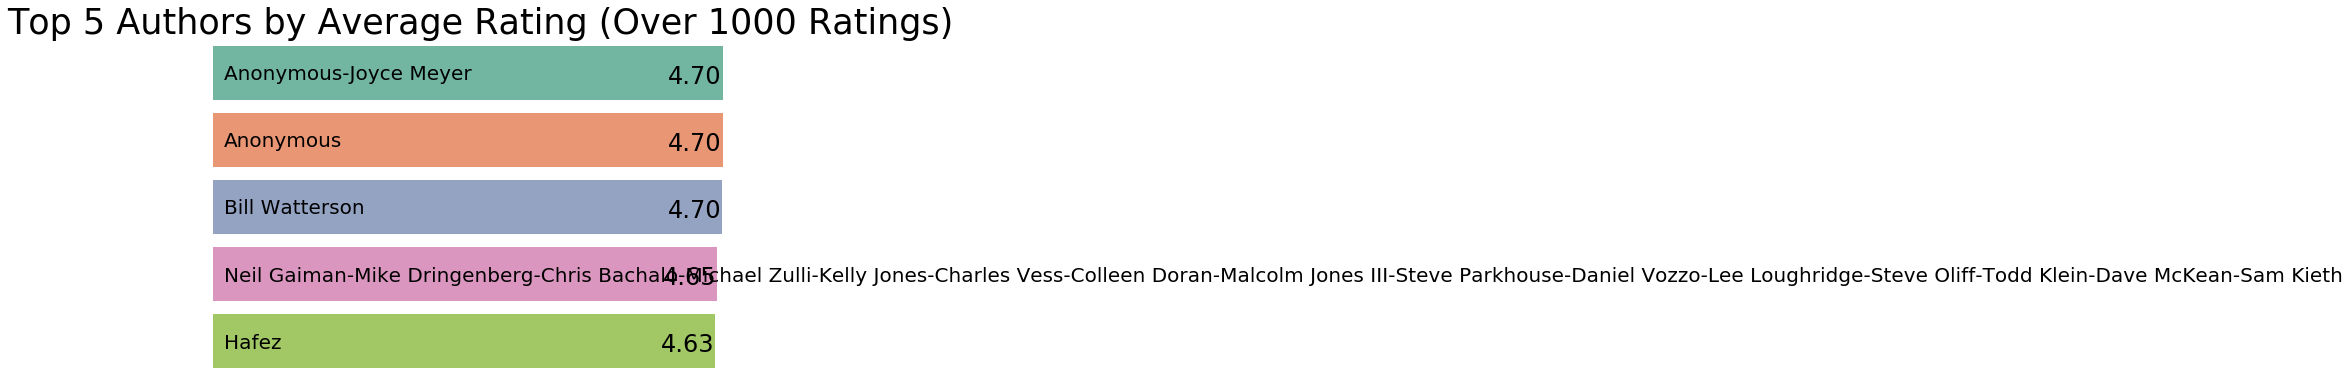

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(top_5_rating_author_over1000['average_rating'], top_5_rating_author_over1000.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Rating (Over 1000 Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.5, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(0.1 , i.get_y()+0.5, str(top_5_rating_author_over1000.index[num]), fontsize = 20, color = 'k')
    num += 1

In [20]:
top_5_rating_author_over1000.index[3]

'Neil Gaiman-Mike Dringenberg-Chris Bachalo-Michael Zulli-Kelly Jones-Charles Vess-Colleen Doran-Malcolm Jones III-Steve Parkhouse-Daniel Vozzo-Lee Loughridge-Steve Oliff-Todd Klein-Dave McKean-Sam Kieth'

<a id='#7'></a>
## 7. Who are the top 5 authors by average number of page per book?

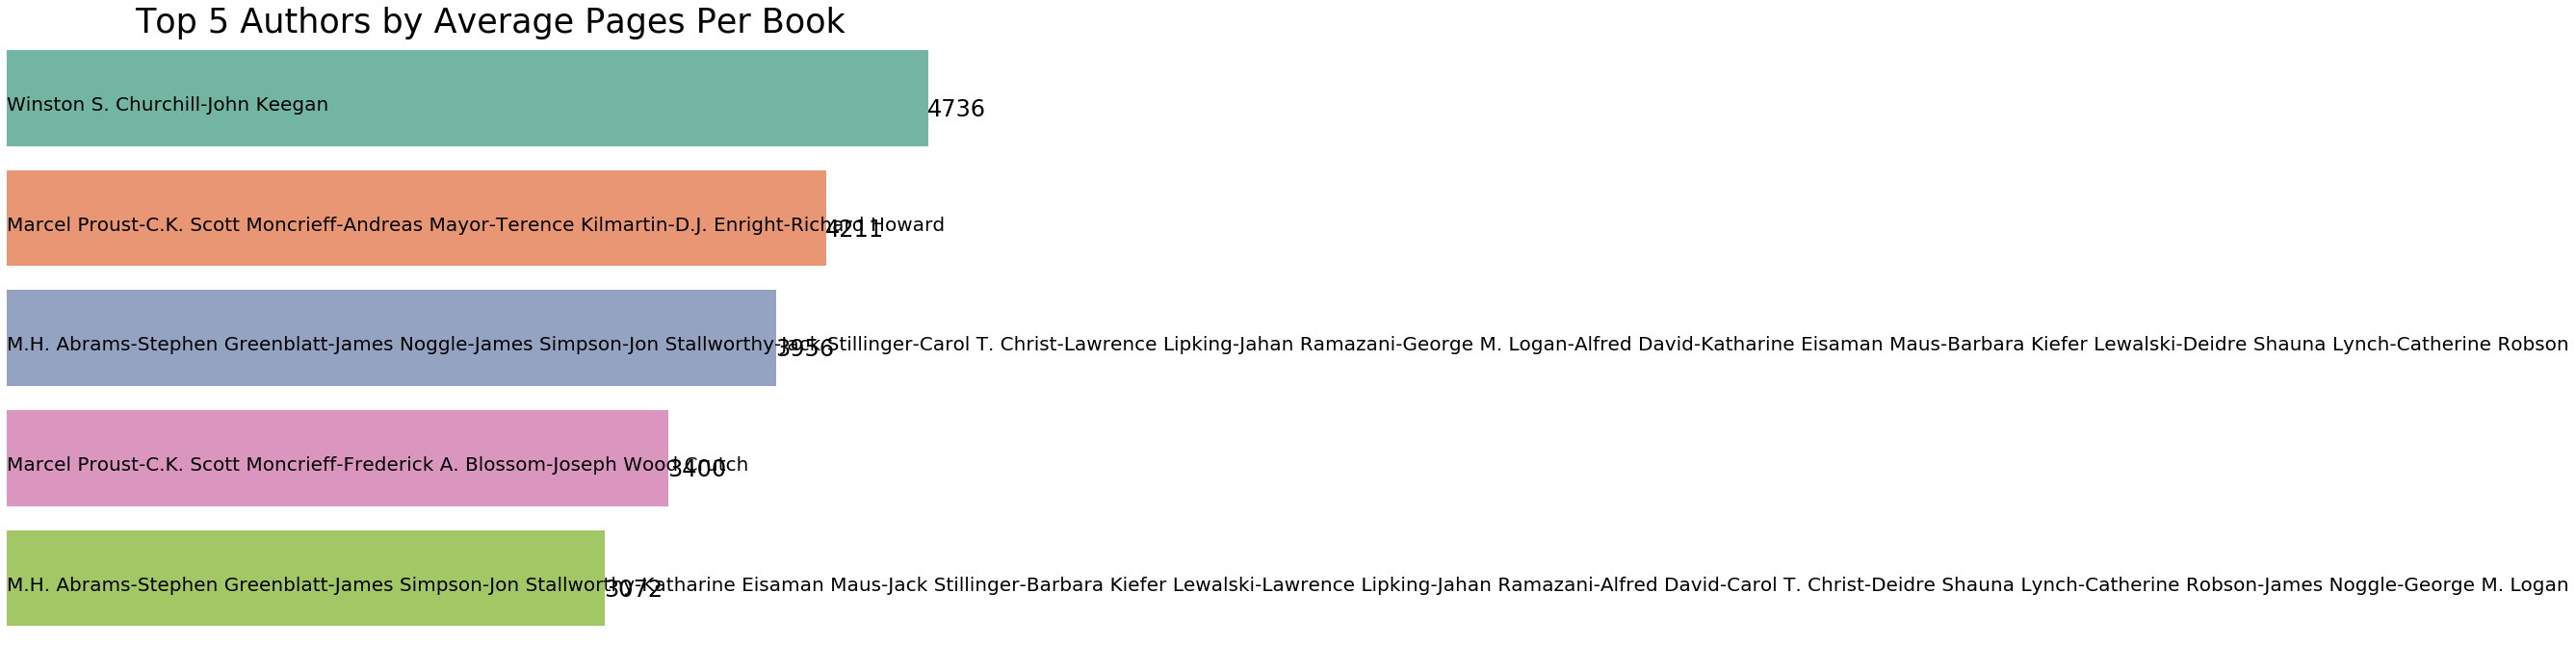

In [21]:
#Attempted graphing of the top 5 authors by avg number of page per book.

author_by_avg_pages = df.groupby('authors')['# num_pages'].mean().reset_index().sort_values('# num_pages', ascending=False).head(5).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(author_by_avg_pages['# num_pages'], author_by_avg_pages.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Pages Per Book", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-2.5, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(1 , i.get_y()+0.5, str(author_by_avg_pages.index[num]), fontsize = 20, color = 'k')
    num += 1


In [36]:
#Very simple way of displaying the above graph in a slightly more readable way.
#Thinking of using this instead of graph.

for i in range(0, len(author_by_avg_pages)):
    print('The authors {} average {:.0f} pages per book they have published.'.format(author_by_avg_pages.index[i], author_by_avg_pages['# num_pages'][i]) +'\n')

The authors Winston S. Churchill-John Keegan average 4736 pages per book they have published.

The authors Marcel Proust-C.K. Scott Moncrieff-Andreas Mayor-Terence Kilmartin-D.J. Enright-Richard Howard average 4211 pages per book they have published.

The authors M.H. Abrams-Stephen Greenblatt-James Noggle-James Simpson-Jon Stallworthy-Jack Stillinger-Carol T. Christ-Lawrence Lipking-Jahan Ramazani-George M. Logan-Alfred David-Katharine Eisaman Maus-Barbara Kiefer Lewalski-Deidre Shauna Lynch-Catherine Robson average 3956 pages per book they have published.

The authors Marcel Proust-C.K. Scott Moncrieff-Frederick A. Blossom-Joseph Wood Crutch average 3400 pages per book they have published.

The authors M.H. Abrams-Stephen Greenblatt-James Simpson-Jon Stallworthy-Katharine Eisaman Maus-Jack Stillinger-Barbara Kiefer Lewalski-Lawrence Lipking-Jahan Ramazani-Alfred David-Carol T. Christ-Deidre Shauna Lynch-Catherine Robson-James Noggle-George M. Logan average 3072 pages per book they ha

Lucky to get away with authors as my default in the string as all the books in this list had many authors.

Find out if these books are collections of stories / diaries as it may explain multiple author and long page lengths. 

Its also a weird metric as because of the above and grouping specifically by author, or authors in this case, we are likely to encounter very long books and specific authors or groups of whose average page count per book is not effected as they only time we could them is in this specific grouping.

TALK ABOUT THE ABOVE "FIX"

<a id='#8'></a>
## 8. What are the top 10 books by average rating? (No limit)

In [23]:
top_10_books_avg_rating = df.sort_values('average_rating', ascending=False).head(10).set_index('title')

rating_book = df.loc[df['ratings_count'] > 100]
top_10_books_avg_rating_over100 = rating_book.sort_values('average_rating', ascending=False).head(10).set_index('title')

rating_book = df.loc[df['ratings_count'] > 1000]
top_10_books_avg_rating_over1000 = rating_book.sort_values('average_rating', ascending=False).head(10).set_index('title')

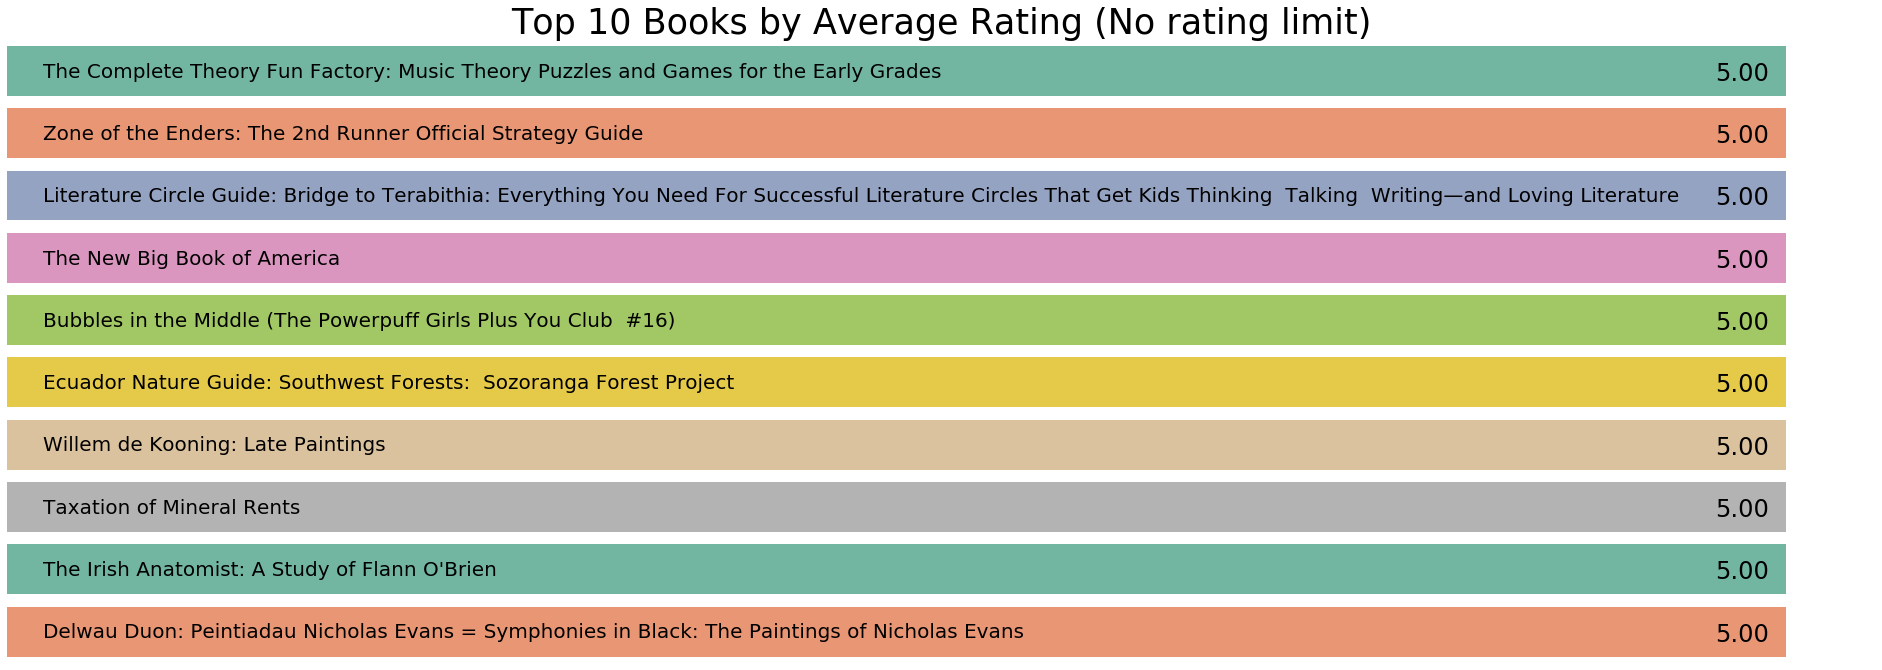

In [24]:
plt.figure(figsize=(27, 10))
ax = sns.barplot(top_10_books_avg_rating['average_rating'], top_10_books_avg_rating.index, palette='Set2')
ax.set_title("Top 10 Books by Average Rating (No rating limit)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.2, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(i.get_x()+0.1, i.get_y()+0.5, str(top_10_books_avg_rating.index[num]), fontsize = 20, color = 'k')
    num += 1


<a id='#9'></a>
## 9. What are the top 10 books by average rating? (Num of Ratings > 100)  

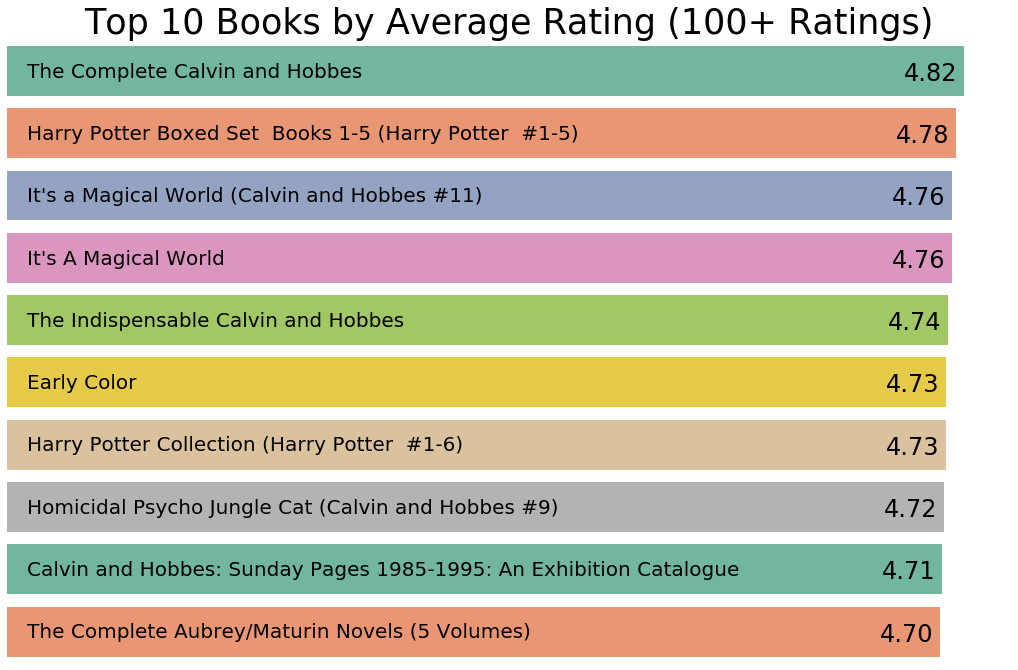

In [25]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(top_10_books_avg_rating_over100['average_rating'], top_10_books_avg_rating_over100.index, palette='Set2')
ax.set_title("Top 10 Books by Average Rating (100+ Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.3, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(i.get_x()+0.1, i.get_y()+0.5, str(top_10_books_avg_rating_over100.index[num]), fontsize = 20, color = 'k')
    num += 1

<a id='#10'></a>
## 10. What are the top 10 books by average rating? (Num of Ratings > 1000)

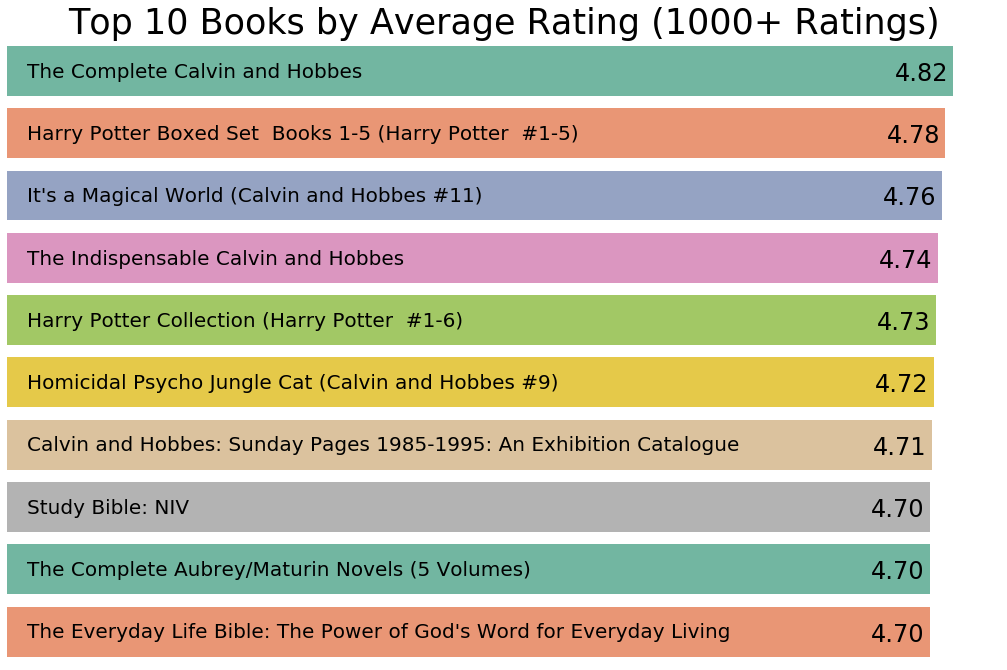

In [26]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(top_10_books_avg_rating_over1000['average_rating'], top_10_books_avg_rating_over1000.index, palette='Set2')
ax.set_title("Top 10 Books by Average Rating (1000+ Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.3, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(i.get_x()+0.1, i.get_y()+0.5, str(top_10_books_avg_rating_over1000.index[num]), fontsize = 20, color = 'k')
    num += 1

<a id='#11'></a>
## 11. Which books are top 5 based on their number of ratings?

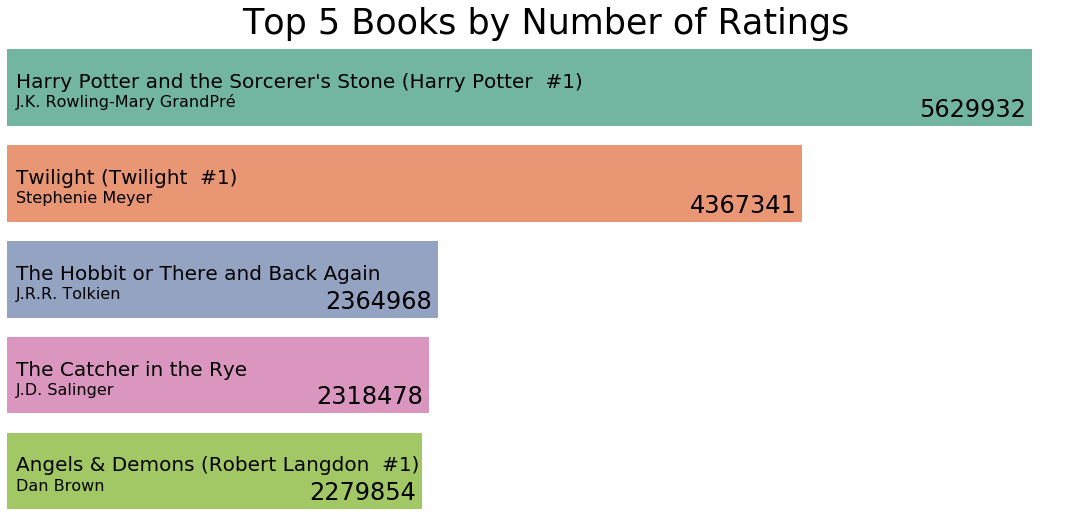

In [27]:
books_by_ratings = df.sort_values('ratings_count', ascending=False).head(5).set_index('title')

plt.figure(figsize=(16, 8))
ax = sns.barplot(books_by_ratings['ratings_count'], books_by_ratings.index, palette='Set2')
ax.set_title("Top 5 Books by Number of Ratings", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-620000, i.get_y()+0.7, "{0:.0f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(50000, i.get_y()+0.4, str(books_by_ratings.index[num]), fontsize = 20, color = 'k')
    ax.text(50000, i.get_y()+0.6, str(books_by_ratings['authors'][num]), fontsize = 16, color = 'k')
    num += 1

<a id='#12'></a>
## 12. What is the average ratings of all books in the dataset?

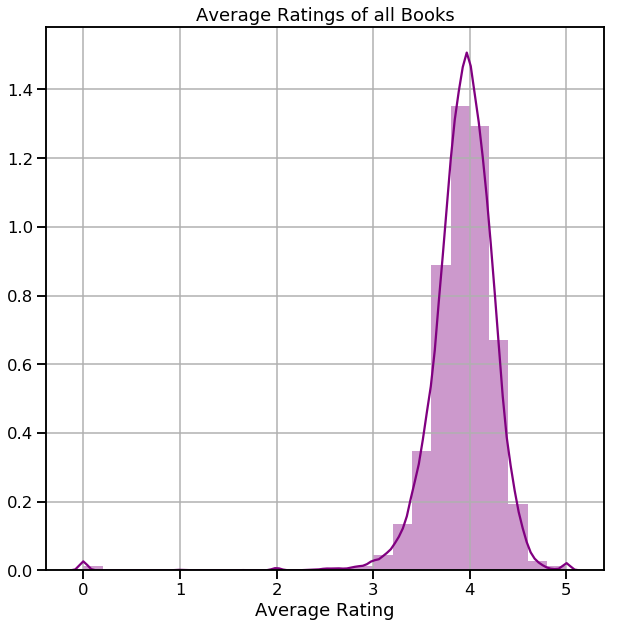

In [28]:
# Average raiting of all books in the dataset.
sns.set_context('talk')
plt.figure(figsize=(10,10))
rating = df.average_rating.astype(float)
ax = sns.distplot(rating, bins=25, color="Purple")
ax.set_xlabel("Average Rating")
ax.set_title("Average Ratings of all Books")
ax.grid()

<a id='#13'></a>
## 13. What are the top 10 books by average rating? (Num of Ratings > 100)

<Figure size 2160x1440 with 0 Axes>

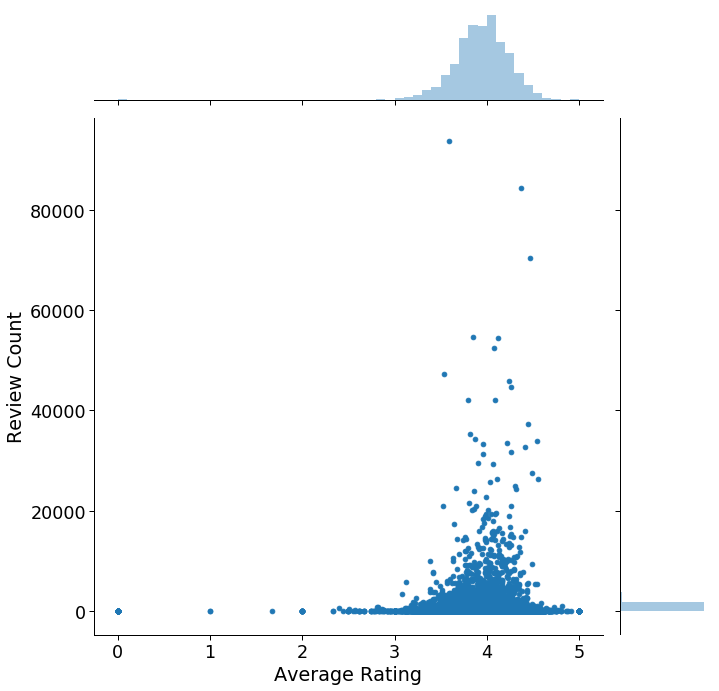

In [29]:
# Average rating of a book based on num of ratings
plt.figure(figsize=(30,20))
df.dropna(0, inplace=True)
sns.set_context('paper', font_scale=2.0)
ax = sns.jointplot(x="average_rating",y='text_reviews_count', kind='scatter',  data=df[['text_reviews_count', 'average_rating']], height=10)
ax.set_axis_labels("Average Rating", "Review Count")
plt.show()

<a id='#14'></a>
## 14. Is there a relationship between the number of books published and the average rating of all those books per author? 

<Figure size 2160x1440 with 0 Axes>

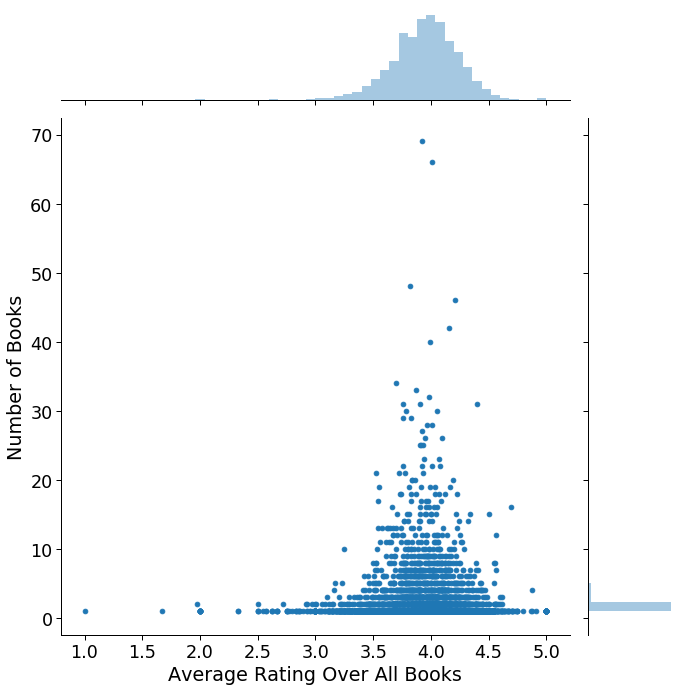

In [30]:
# Each data point is an author based on average rating over all their books.
most_books = df[['authors', 'title', 'average_rating']]
most_books_holder_1 = most_books.groupby('authors')['title'].count().reset_index().reset_index()
most_books_holder_2 = most_books.groupby('authors')['average_rating'].mean().reset_index()
most_books = pd.merge(most_books_holder_1, most_books_holder_2, on='authors', how='inner')
most_books = most_books[most_books.average_rating != 0]

plt.figure(figsize=(30,20))
sns.set_context('paper', font_scale=2.0)
ax = sns.jointplot(x="average_rating",y='title', kind='scatter',  data=most_books[['average_rating', 'title']], height=10)
ax.set_axis_labels("Average Rating Over All Books", "Number of Books")
plt.show()

<Figure size 2160x1440 with 0 Axes>

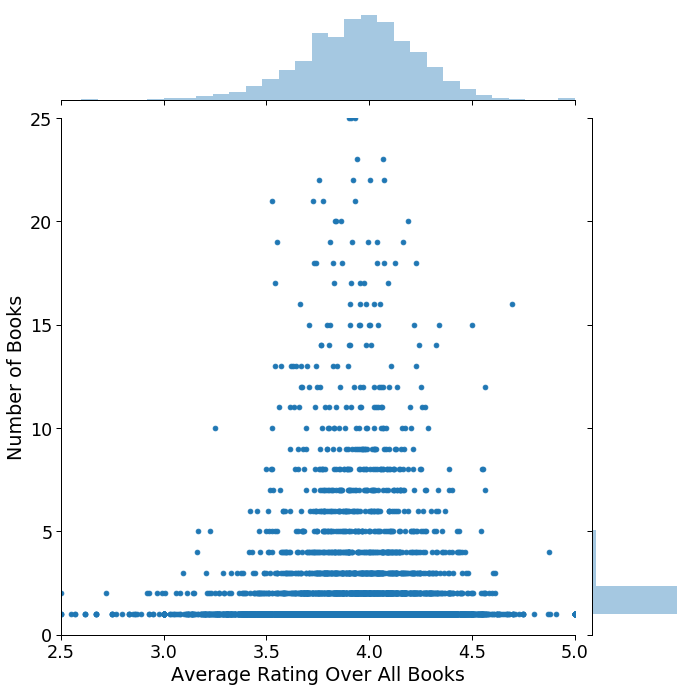

In [31]:
# Zoom in on the dense part of the above graph (MENTION x/y limits!)
plt.figure(figsize=(30,20))
sns.set_context('paper', font_scale=2.0)
ax = sns.jointplot(x="average_rating",y='title', kind='scatter',  data=most_books[['average_rating', 'title']], height=10, xlim=(2.5, 5), ylim=(0, 25))
ax.set_axis_labels("Average Rating Over All Books", "Number of Books")
plt.show()

<a id='#15'></a>
## 15. What is the relationship between the number of pages of a book and its number of rating? 

<Figure size 1080x720 with 0 Axes>

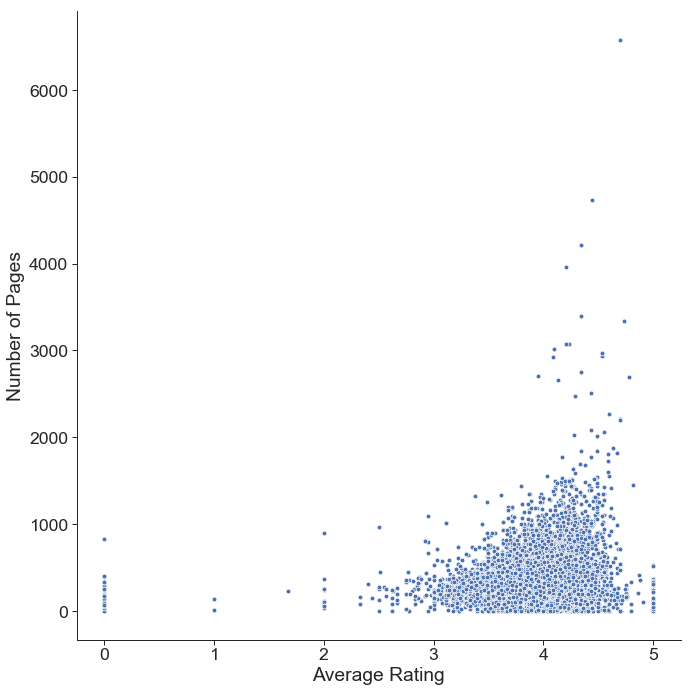

In [32]:
# Relationship between the average rating and number of pages of EACH BOOK.
pages_vs_ratings = df[["average_rating", '# num_pages']]
plt.figure(figsize=(15,10))
sns.set(style="ticks")
sns.set_context('paper', font_scale=2.0)
ax = sns.relplot(x="average_rating", y='# num_pages', data=pages_vs_ratings, height=10)
ax.set_axis_labels("Average Rating", "Number of Pages")

<a id='#takeaways'></a>
# Learning Takeaways

Make gif of minimalist graph. Talk little about design.
  
Talk about utilising seaborn / possibly what I missed out on using?



<a id='#summary'></a>
# Summary